In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import xarray as xr

## 1 Read and check the data

### 30-day RCLVs

In [249]:
year = 2010
dur = 30
fn = './RCLV_info/RCLV_' + str(dur) + 'day_' + str(year) + '.csv'
df = pd.read_csv(fn, index_col=0)
df.head()

,id,date_start,date_end,duration,area,radius,cyc,center_traj,dx,speed_x,dy,speed_y
0,20100101_030day_000001,2010-01-01,2010-01-31,30,2530.444367,28.380723,-1,"[[120.109375, 24.171875], [119.79946899414062,...",7.042493,0.000003,-140.327477,-0.000054
1,20100101_030day_000002,2010-01-01,2010-01-31,30,35592.552315,106.439942,1,"[[119.734375, 21.484375], [119.09984588623047,...",-204.809876,-0.000079,-154.524401,-0.000060
2,20100101_030day_000003,2010-01-01,2010-01-31,30,4384.483171,37.358056,-1,"[[113.546875, 20.328125], [113.2808609008789, ...",-103.026358,-0.000040,-87.406557,-0.000034
3,20100101_030day_000004,2010-01-01,2010-01-31,30,8961.465925,53.409018,1,"[[116.265625, 19.796875], [116.00122833251953,...",-132.766348,-0.000051,-67.603312,-0.000026
4,20100101_030day_000005,2010-01-01,2010-01-31,30,3292.867087,32.375178,-1,"[[114.484375, 18.765625], [113.91553497314453,...",-246.532391,-0.000095,-100.931801,-0.000039


### Particles trajectories

In [174]:
year = 2012
dur = 60
fn = './RCLV_info/RCLV_' + str(dur) + 'day_' + str(year) + '.csv'
df = pd.read_csv(fn, index_col=0)
eddyid = df['id'][4]
netfn = './Trajectory/' + eddyid + '.nc'
print(netfn)
ds = xr.open_dataset(netfn)
ds

./Trajectory/20120201_060day_000002.nc


<xarray.Dataset>
Dimensions:  (time: 7, x0: 31, y0: 40)
Coordinates:
  * x0       (x0) float32 117.515625 117.546875 ... 118.421875 118.453125
  * time     (time) datetime64[ns] 2012-02-01 2012-02-11 ... 2012-04-01
  * y0       (y0) float32 20.109375 20.140625 20.171875 ... 21.296875 21.328125
Data variables:
    x        (time, y0, x0) float32 ...
    y        (time, y0, x0) float32 ...

#### x0: initial longitude, y0: initial latitude, time: time
#### x, y: longitude and latitude of particles on real time

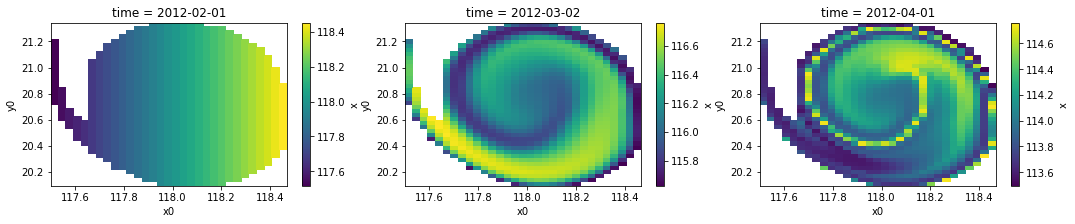

In [175]:
fig = plt.figure(figsize=(18,3))
plt.subplot(131)
ds.x[0, :, :].plot()
plt.subplot(132)
ds.x[3, :, :].plot()
plt.subplot(133)
ds.x[6, :, :].plot()

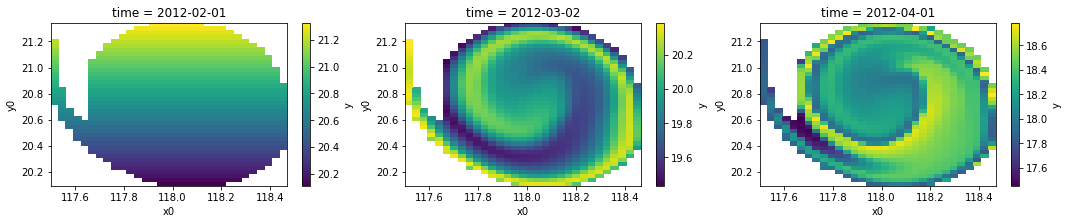

In [176]:
fig = plt.figure(figsize=(18,3))
plt.subplot(131)
ds.y[0, :, :].plot()
plt.subplot(132)
ds.y[3, :, :].plot()
plt.subplot(133)
ds.y[6, :, :].plot()

### RCLV particles positions on 1-day, 30-day, and 60-day

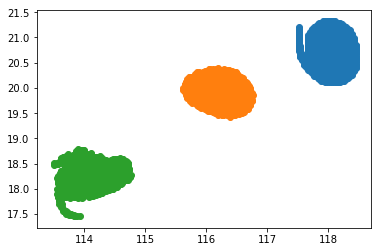

In [177]:
plt.scatter(ds.x[0, :,:], ds.y[0, :,:])
plt.scatter(ds.x[3, :,:], ds.y[3, :,:])
plt.scatter(ds.x[6, :,:], ds.y[6, :,:])

## 2 Time series of RCLVs numbers in SCS

In [178]:
num_30 = np.zeros(6)
num_60 = np.zeros(6)
num_90 = np.zeros(6)

t = 0
for year in np.arange(2010, 2016, 1):
    df1 = pd.read_csv('./RCLV_info/RCLV_30day_' + str(year) + '.csv')
    df2 = pd.read_csv('./RCLV_info/RCLV_60day_' + str(year) + '.csv')
    df3 = pd.read_csv('./RCLV_info/RCLV_90day_' + str(year) + '.csv')
    num_30[t] = df1.shape[0]
    num_60[t] = df2.shape[0]
    num_90[t] = df3.shape[0]
    t += 1
    

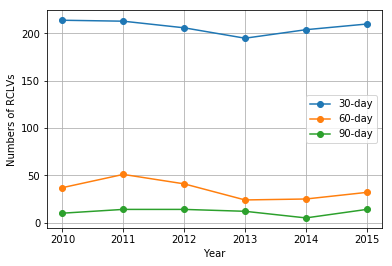

In [179]:
h1 = plt.plot(num_30, marker='o')
h2 = plt.plot(num_60, marker='o')
h3 = plt.plot(num_90, marker='o')
plt.grid()
plt.xticks(ticks=np.arange(6), labels=np.arange(2010,2016,1))
plt.ylabel('Numbers of RCLVs')
plt.xlabel('Year')
plt.legend([h1[0], h2[0], h3[0]],('30-day', '60-day', '90-day'))

## 3 A case of 60-day RCLV in 2012

In [180]:
# read sla data
sla = np.load('sla.npy')
cor = np.load('cor.npz')
lon = cor['arr_0']
lat = cor['arr_1']
time = cor['arr_2']

./Trajectory/20120201_060day_000002.nc


(16, 22)

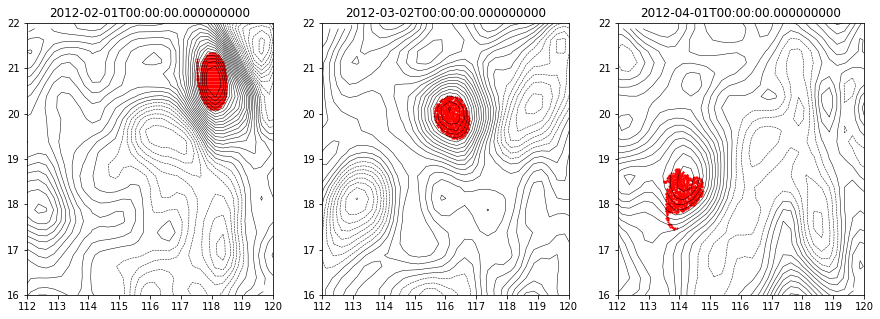

In [181]:
year = 2012
dur = 60
fn = './RCLV_info/RCLV_' + str(dur) + 'day_' + str(year) + '.csv'
df = pd.read_csv(fn, index_col=0)
eddyid = df['id'][4]
netfn = './Trajectory/' + eddyid + '.nc'
print(netfn)
ds = xr.open_dataset(netfn)

fig = plt.figure(figsize=(15,5))
lev1 = np.arange(-40, 40, 2)
plt.subplot(1,3,1)
plt.contour(lon, lat, sla[0,:,:]*100, lev1, colors='k', linewidths=0.5)
plt.scatter(ds.x[0, :,:], ds.y[0, :,:], s=1, color='r')
plt.title(time[0])
plt.xlim(112, 120)
plt.ylim(16, 22)
plt.subplot(1,3,2)
plt.contour(lon, lat, sla[30,:,:]*100, lev1, colors='k', linewidths=0.5)
plt.scatter(ds.x[3, :,:], ds.y[3, :,:], s=1, color='r')
plt.title(time[30])
plt.xlim(112, 120)
plt.ylim(16, 22)
plt.subplot(1,3,3)
plt.contour(lon, lat, sla[60,:,:]*100, lev1, colors='k', linewidths=0.5)
plt.scatter(ds.x[6, :,:], ds.y[6, :,:], s=1, color='r')
plt.title(time[60])
plt.xlim(112, 120)
plt.ylim(16, 22)

## 4 The trajectories of the center points of all RCLVs from 2010 to 2015

Text(0, 0.5, 'LAT')

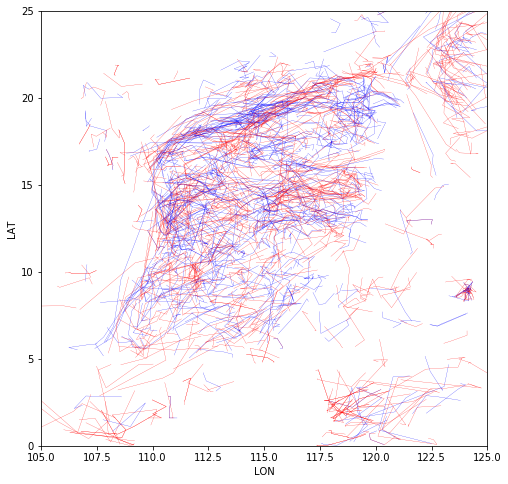

In [250]:
import re

fig = plt.figure(figsize=(8,8))
dur = ['30', '60', '90']

for i_dur in np.arange(2):
    
    for year in np.arange(2010, 2016, 1):
        fn = './RCLV_info/RCLV_' + dur[i_dur] + 'day_' + str(year) + '.csv'
        df = pd.read_csv(fn, index_col=0)
        
        for num in np.arange(df.shape[0]):
            
            traj_str = df['center_traj'][num]
            traj_str
            traj_list = re.findall(r"\d+\.?\d*", traj_str)
            traj = [float(cc) for cc in traj_list]
            traj
            xx = traj[0::2]
            yy = traj[1::2]
            
            cyc = df['cyc'][num]
            
            if cyc > 0:
                
                plt.plot(xx, yy, linewidth=0.2, color='r')
                
            else:
                
                plt.plot(xx, yy, linewidth=0.2, color='b')
                
plt.xlim(105, 125)
plt.ylim(0, 25)
plt.xlabel('LON')
plt.ylabel('LAT')